In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import glob
import os
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

In [2]:
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt


# OK = OrdinaryKriging(
#     data[:, 0],
#     data[:, 1],
#     data[:, 2],
#     variogram_model="linear",
#     verbose=False,
#     enable_plotting=False,
# )

# z, ss = OK.execute("grid", gridx, gridy)
# kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
# plt.imshow(z)
# plt.show()

In [3]:
i=0
region=[]
region=["강서구","강북구","강남구","강동구","관악구","광진구","구로구","금천구","노원구","도봉구","동대문구","동작구","마포구","서대문구","서초구","성동구","성북구","송파구","양천구","영등포구","용산구","은평구","종로구","중구","중랑구"]
test=["용산구","은평구","종로구","중구","중랑구"]
train=["강서구","강북구","강남구","강동구","관악구","광진구","구로구","금천구","노원구","도봉구","동대문구","동작구","마포구","서대문구","서초구","성동구","성북구","송파구","양천구","영등포구"]
for i in range(len(region)):
    data=requests.get("http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?stationName="+region[i]+"&dataTerm=3MONTH&pageNo=1&numOfRows=100&ServiceKey=uWcDgu8b4msGBpJVMLudLsfYadK9EGBnuCk3TyON1rMfhVuzLVwJ1t2tPlCwfBINamWnDZ3qokqGGqh%2B2oxmPA%3D%3D&ver=1.3")
    soup=bs(data.text)
    data2=requests.get("http://openapi.airkorea.or.kr/openapi/services/rest/MsrstnInfoInqireSvc/getMsrstnList?addr=서울&stationName="+region[i]+"&pageNo=1&numOfRows=100&ServiceKey=uWcDgu8b4msGBpJVMLudLsfYadK9EGBnuCk3TyON1rMfhVuzLVwJ1t2tPlCwfBINamWnDZ3qokqGGqh%2B2oxmPA%3D%3D")
    soup2=bs(data2.text)
    data=pd.DataFrame([[t.datatime.text,t.pm10value.text,t.pm25value.text,t.so2value.text,t.covalue.text,t.o3value.text,t.no2value.text,soup2.items.item.dmx.text,soup2.items.item.dmy.text] for t in soup.find_all("items")[0].find_all('item')])

    data.columns=['날짜','PM10','PM2.5','SO2','CO','O3','NO2','X좌표','Y좌표']
# #     def change_time(x):
# #         if x.find("24:00") !=-1:
# #             return np.nan
# #         else:
# #             return pd.to_datetime(x)

#     data['날짜'] =data['날짜'].apply(change_time)
    print(str(region[i]))
    data.to_csv("./"+str(region[i])+".csv",encoding='ms949')

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


강서구
강북구
강남구
강동구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [4]:
data.head()

,날짜,PM10,PM2.5,SO2,CO,O3,NO2,X좌표,Y좌표
0,2020-12-25 17:00,21,10,0.004,0.4,0.027,0.016,37.584953,127.094283
1,2020-12-25 16:00,23,8,0.003,0.4,0.029,0.013,37.584953,127.094283
2,2020-12-25 15:00,23,11,0.003,0.4,0.028,0.015,37.584953,127.094283
3,2020-12-25 14:00,26,11,0.004,0.4,0.027,0.016,37.584953,127.094283
4,2020-12-25 13:00,29,11,0.004,0.4,0.024,0.019,37.584953,127.094283


In [5]:
data.sort_values(by=["날짜"],axis=0)

,날짜,PM10,PM2.5,SO2,CO,O3,NO2,X좌표,Y좌표
99,2020-12-21 14:00,40,26,0.004,0.7,0.009,0.051,37.584953,127.094283
98,2020-12-21 15:00,26,19,0.004,0.6,0.014,0.040,37.584953,127.094283
97,2020-12-21 16:00,35,19,0.004,0.5,0.018,0.033,37.584953,127.094283
96,2020-12-21 17:00,46,27,0.004,0.5,0.016,0.038,37.584953,127.094283
95,2020-12-21 18:00,35,23,0.004,0.6,0.009,0.051,37.584953,127.094283
...,...,...,...,...,...,...,...,...,...
4,2020-12-25 13:00,29,11,0.004,0.4,0.024,0.019,37.584953,127.094283
3,2020-12-25 14:00,26,11,0.004,0.4,0.027,0.016,37.584953,127.094283
2,2020-12-25 15:00,23,11,0.003,0.4,0.028,0.015,37.584953,127.094283
1,2020-12-25 16:00,23,8,0.003,0.4,0.029,0.013,37.584953,127.094283


In [6]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
import platform
import csv

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

region=["강서구","강북구","강남구","강동구","관악구","광진구","구로구","금천구","노원구","도봉구","동대문구","동작구","마포구","서대문구","서초구","성동구","성북구","송파구","양천구","영등포구","용산구","은평구","종로구","중구","중랑구"]    

In [7]:
PM={}
for j in range (len(data)):
    for i in range (len(region)):
    
        data=pd.read_csv("./"+str(region[i])+".csv",encoding='ms949')
        if data['PM2.5'][j]=='-':
            PM[str(region[i])]=float(0.0)
        else:
            PM[str(region[i])]=float(data['PM2.5'][j])
print(PM)

{'강서구': 22.0, '강북구': 31.0, '강남구': 26.0, '강동구': 29.0, '관악구': 0.0, '광진구': 25.0, '구로구': 27.0, '금천구': 31.0, '노원구': 35.0, '도봉구': 30.0, '동대문구': 30.0, '동작구': 26.0, '마포구': 30.0, '서대문구': 24.0, '서초구': 30.0, '성동구': 25.0, '성북구': 31.0, '송파구': 30.0, '양천구': 28.0, '영등포구': 28.0, '용산구': 24.0, '은평구': 0.0, '종로구': 26.0, '중구': 32.0, '중랑구': 26.0}


In [8]:
position={}
for i in range (len(region)):
    data=pd.read_csv("./"+str(region[i])+".csv",encoding='ms949')
    position[str(region[i])]=data["Y좌표"][0],data['X좌표'][0]
print(position)

{'강서구': (126.835094, 37.544655999999996), '강북구': (127.01195200000001, 37.64793), '강남구': (127.04728899999999, 37.517562), '강동구': (127.136806, 37.545089000000004), '관악구': (126.927089, 37.488242), '광진구': (127.095706, 37.544639000000004), '구로구': (126.889692, 37.498498), '금천구': (126.90833300000001, 37.452386), '노원구': (127.067876, 37.657415), '도봉구': (127.02933300000001, 37.654278000000005), '동대문구': (127.029642, 37.576169), '동작구': (126.971547, 37.480989), '마포구': (126.90545700000001, 37.555609999999994), '서대문구': (126.94953400000001, 37.593749), '서초구': (126.994611, 37.504546999999995), '성동구': (127.04968500000001, 37.542035999999996), '성북구': (127.02726399999999, 37.606667), '송파구': (127.09238500000001, 37.502685), '양천구': (126.85868899999998, 37.523286), '영등포구': (126.89737, 37.525007), '용산구': (127.00508300000001, 37.540314), '은평구': (126.933504, 37.610471000000004), '종로구': (127.005028, 37.572025), '중구': (126.97596100000001, 37.564639), '중랑구': (127.094283, 37.584953000000006)}


In [9]:
Total={}
for j in range (len(data)):
    for i in range (len(region)):
    
        data=pd.read_csv("./"+str(region[i])+".csv",encoding='ms949')
        if data['PM2.5'][j]=='-':
            Total[str(region[i])]=data["Y좌표"][0],data['X좌표'][0],float(0.0),
        else:
            Total[str(region[i])]=data["Y좌표"][0],data['X좌표'][0],float(data['PM2.5'][j])
print(Total)

{'강서구': (126.835094, 37.544655999999996, 22.0), '강북구': (127.01195200000001, 37.64793, 31.0), '강남구': (127.04728899999999, 37.517562, 26.0), '강동구': (127.136806, 37.545089000000004, 29.0), '관악구': (126.927089, 37.488242, 0.0), '광진구': (127.095706, 37.544639000000004, 25.0), '구로구': (126.889692, 37.498498, 27.0), '금천구': (126.90833300000001, 37.452386, 31.0), '노원구': (127.067876, 37.657415, 35.0), '도봉구': (127.02933300000001, 37.654278000000005, 30.0), '동대문구': (127.029642, 37.576169, 30.0), '동작구': (126.971547, 37.480989, 26.0), '마포구': (126.90545700000001, 37.555609999999994, 30.0), '서대문구': (126.94953400000001, 37.593749, 24.0), '서초구': (126.994611, 37.504546999999995, 30.0), '성동구': (127.04968500000001, 37.542035999999996, 25.0), '성북구': (127.02726399999999, 37.606667, 31.0), '송파구': (127.09238500000001, 37.502685, 30.0), '양천구': (126.85868899999998, 37.523286, 28.0), '영등포구': (126.89737, 37.525007, 28.0), '용산구': (127.00508300000001, 37.540314, 24.0), '은평구': (126.933504, 37.610471000000004, 0.0), '종로구

In [10]:
G=nx.Graph()

#data=pd.read_csv("./"+str(region[0])+".csv",encoding='ms949')
#print(data)
i=0
G=nx.Graph()
for i in range (len(region)):
    G.add_node(region[i],pos=position[region[i]])
pos=nx.get_node_attributes(G,'pos')    


In [11]:
%matplotlib tk
i=0
PM={}
ok=[]
ok1=[]
G=nx.Graph()
for i in range (len(region)):
    G.add_node(region[i],pos=position[region[i]])

for j in range (len(data)):
    for i in range (len(region)):
        data=pd.read_csv("./"+str(region[i])+".csv",encoding='ms949')
        if data['PM2.5'][j]=='-':
            PM[str(region[i])]=float(0.0)
        else:
            PM[str(region[i])]=float(data['PM2.5'][j])
        ok+=[[data["Y좌표"][0],data['X좌표'][0],PM[str(region[i])]]]

#         z, ss = OK.execute("grid", gridx, gridy)
#         kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
#         plt.imshow(z)
#         plt.show()
    ok1+=[ok]
    ok=[]
#     nc=nx.draw(G,pos,font_family=font_name,node_color=[v*1.2 for v in PM.values()],node_size=[v * 30 for v in PM.values()],cmap = plt.cm.get_cmap('OrRd'),with_labels=True)
#     plt.colorbar(nc)
#     plt.pause(0.1)
#     plt.clf()


In [12]:
%matplotlib tk
i=0
Total={}
ok=[]
ok1=[]
G=nx.Graph()
for i in range (len(region)):
    G.add_node(region[i],pos=position[region[i]])

for j in range (len(data)):
    for i in range (len(region)):
    
        data=pd.read_csv("./"+str(region[i])+".csv",encoding='ms949')
        if data['PM2.5'][j]=='-':
            Total[str(region[i])]=data["Y좌표"][0],data['X좌표'][0],float(0.0)
            ok+=[[data["Y좌표"][0],data['X좌표'][0],float(0.0),data['날짜'][j]]]
        else:
            Total[str(region[i])]=data["Y좌표"][0],data['X좌표'][0],float(data['PM2.5'][j])
            ok+=[[data["Y좌표"][0],data['X좌표'][0],float(data['PM2.5'][j]),data['날짜'][j]]]
print(ok)

[[126.835094, 37.544655999999996, 12.0, '2020-12-25 17:00'], [127.01195200000001, 37.64793, 14.0, '2020-12-25 17:00'], [127.04728899999999, 37.517562, 15.0, '2020-12-25 17:00'], [127.136806, 37.545089000000004, 16.0, '2020-12-25 17:00'], [126.927089, 37.488242, 8.0, '2020-12-25 17:00'], [127.095706, 37.544639000000004, 13.0, '2020-12-25 17:00'], [126.889692, 37.498498, 2.0, '2020-12-25 17:00'], [126.90833300000001, 37.452386, 11.0, '2020-12-25 17:00'], [127.067876, 37.657415, 17.0, '2020-12-25 17:00'], [127.02933300000001, 37.654278000000005, 8.0, '2020-12-25 17:00'], [127.029642, 37.576169, 14.0, '2020-12-25 17:00'], [126.971547, 37.480989, 13.0, '2020-12-25 17:00'], [126.90545700000001, 37.555609999999994, 11.0, '2020-12-25 17:00'], [126.94953400000001, 37.593749, 12.0, '2020-12-25 17:00'], [126.994611, 37.504546999999995, 8.0, '2020-12-25 17:00'], [127.04968500000001, 37.542035999999996, 10.0, '2020-12-25 17:00'], [127.02726399999999, 37.606667, 7.0, '2020-12-25 17:00'], [127.092385

In [13]:
ok_data=np.array(ok)

In [14]:
ok_data.shape

(2500, 4)

In [15]:
df=pd.DataFrame(ok)

In [16]:
df.head

<bound method NDFrame.head of                0          1     2                 3
0     126.835094  37.544656  12.0  2020-12-25 17:00
1     127.011952  37.647930  14.0  2020-12-25 17:00
2     127.047289  37.517562  15.0  2020-12-25 17:00
3     127.136806  37.545089  16.0  2020-12-25 17:00
4     126.927089  37.488242   8.0  2020-12-25 17:00
...          ...        ...   ...               ...
2495  127.005083  37.540314  24.0  2020-12-21 14:00
2496  126.933504  37.610471   0.0  2020-12-21 14:00
2497  127.005028  37.572025  26.0  2020-12-21 14:00
2498  126.975961  37.564639  32.0  2020-12-21 14:00
2499  127.094283  37.584953  26.0  2020-12-21 14:00

[2500 rows x 4 columns]>

In [17]:
df=df.sort_values(by=3,axis=0)

In [18]:
df

,0,1,2,3
2499,127.094283,37.584953,26.0,2020-12-21 14:00
2475,126.835094,37.544656,22.0,2020-12-21 14:00
2476,127.011952,37.647930,31.0,2020-12-21 14:00
2477,127.047289,37.517562,26.0,2020-12-21 14:00
2478,127.136806,37.545089,29.0,2020-12-21 14:00
...,...,...,...,...
22,127.005028,37.572025,16.0,2020-12-25 17:00
23,126.975961,37.564639,12.0,2020-12-25 17:00
24,127.094283,37.584953,10.0,2020-12-25 17:00
12,126.905457,37.555610,11.0,2020-12-25 17:00


In [25]:
df_sample=df[df[3]=="2020-12-24 14:00"]

In [26]:
df_sample=df_sample[df_sample[2]!=0]

In [27]:
df_sample

,0,1,2,3
685,127.029642,37.576169,19.0,2020-12-24 14:00
676,127.011952,37.647930,23.0,2020-12-24 14:00
677,127.047289,37.517562,16.0,2020-12-24 14:00
678,127.136806,37.545089,18.0,2020-12-24 14:00
679,126.927089,37.488242,14.0,2020-12-24 14:00
680,127.095706,37.544639,17.0,2020-12-24 14:00
681,126.889692,37.498498,15.0,2020-12-24 14:00
682,126.908333,37.452386,19.0,2020-12-24 14:00
683,127.067876,37.657415,22.0,2020-12-24 14:00
684,127.029333,37.654278,16.0,2020-12-24 14:00


In [28]:
ok_data=df_sample.to_numpy()

In [29]:
ok_data.shape

(24, 4)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 2.4032072814237932e-09
Nugget: 5.446623843709371 



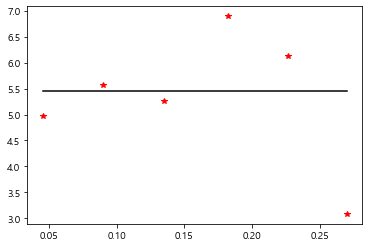

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


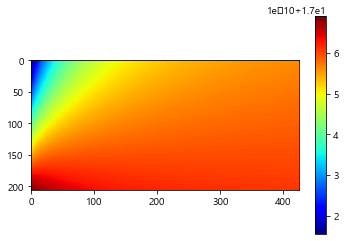

In [30]:
%matplotlib inline
OK = OrdinaryKriging(
    ok_data[:, 0],
    ok_data[:, 1],
    ok_data[:, 2],
    variogram_model="linear",
    verbose=True,
    enable_plotting=True
)
gridx= np.arange(127.136, 128.833, 0.004)
gridy= np.arange(37.452, 37.658,0.001)
z,ss= OK.execute("grid", gridx, gridy)
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z,cmap='jet')
plt.colorbar()


plt.show()
#plt.pause(0.2)
#plt.clf

In [ ]:
plt.close